## Вариант 12. Касьянов Семен

In [39]:
import numpy as np
from matplotlib import pyplot as plt


Дано уравнение $8x^3 - 4\ln(1+3x^2) + 1 = 0$ \
\
Локализовать корни уравнения, решить методами простой итерации и Ньютона с точностью $10^{-5}$.

In [40]:
x = np.arange(-0.5, 1, 0.01)
y = 8 * x**3 - 4*np.log(1 + 3 * x**2) + 1

Локализуем корни уравнения с помощью построения графика

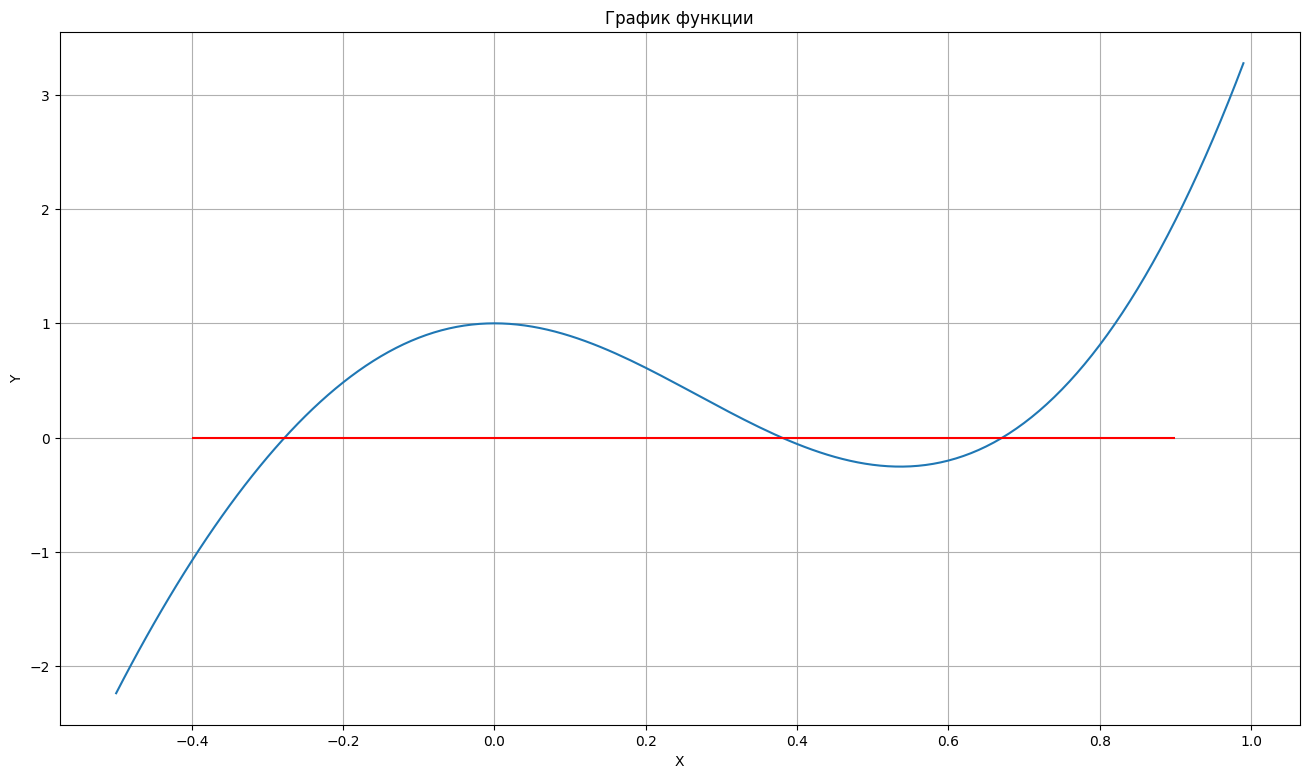

In [41]:
fig, ax = plt.subplots(figsize = (16,9))
plt.plot(x, y)
plt.hlines(0, -0.4, 0.9, colors = 'r')
plt.title('График функции')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

$x_{1}  \approx -0.3, \quad x_{2} \approx 0.37, \quad x_{3} \approx 0.65$ \
\
"Точные" значения решений, полученные с помощью Wolfram: \
\
$x_{1}  = -0.27717988, \quad x_{2} = 0.37977137, \quad x_{3} = 0.67150410$ \
\
Будем использовать их для вычисления ошибки

## Метод простой итерации

В качестве $\tau$ возьмём значение -0.1 \
\
В таком случае выражение для итеративного процесса будет выглядеть следующим образом: $x^{k+1} = x^{k} - \tau f(x^{k}) = \varphi(x^{k})$ \
\
$\varphi(x) = x - 0.1(8x^{3} - 4\ln(1 + 3x^2) + 1)$ \
\
В таком случае, $\varphi^{'}(x) = 1 - 2.4x^{2} + \cfrac{12x}{5 + 15x^{2}}$ \
\
Построим график $||\varphi^{'}(x)||$

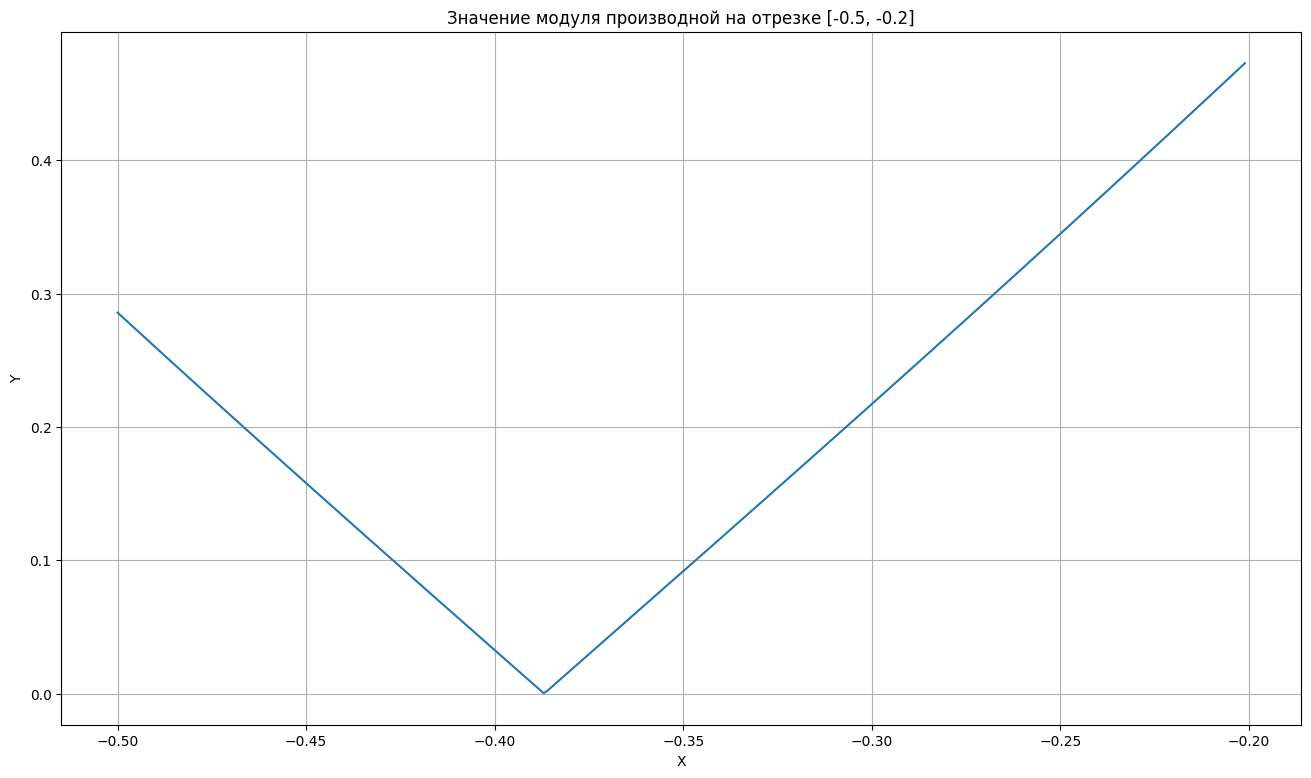

In [42]:
x = np.arange(-0.5, -0.2, 0.001)
y = abs(1 - 2.4 * x**2 + 12 * x / (5 + 15 * x**2))
fig, ax = plt.subplots(figsize = (16,9))
plt.plot(x, y)
plt.grid()
plt.title(f'Значение модуля производной на отрезке [-0.5, -0.2]')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Как видно из графика, значение модуля производной в некоторой окрестности искомого корня не превышает 0.25. Возьмём его в качестве q \
\
$\varepsilon_{0} = |x_{0} - x^{\star}| \approx 0.03$
\
\
Таким образом $k = \cfrac{\ln(\frac{1}{\varepsilon})}{\ln(\frac{1}{q})} + 1 \approx 7 ,\, где \,  \varepsilon = \cfrac{10^{-5}}{\varepsilon_{0}}, \, q = 0.25$ \
\
Теперь найдём корень $x_{1}$ итеративно, используя в качестве критерия останова $||f(x_{k})|| < \varepsilon$


In [43]:
x = -0.3
k = 0
X = []
X.append(x)
error = [] # Сюда добавляем значение ошибки на каждой итерации
ostan = [] # Сюда добавляем значение критерия останова на каждой итерации
error.append(abs(x - -0.27717988))
ostan.append(abs(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1))
while abs(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1) > 10**(-5):
    k += 1
    x = x - 0.1*(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1)
    X.append(x)
    ostan.append(abs(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1))
    error.append(abs(x - -0.27717988))
print(f'Полученный ответ - {x}, количество итераций - {k}')


Полученный ответ - -0.2771805282533204, количество итераций - 8
9 9


Как можно увидеть, понадобилось лишь 8 итераций для достижения точности $10^{-5}$ \
\
Построим графики ошибки и критерия останова

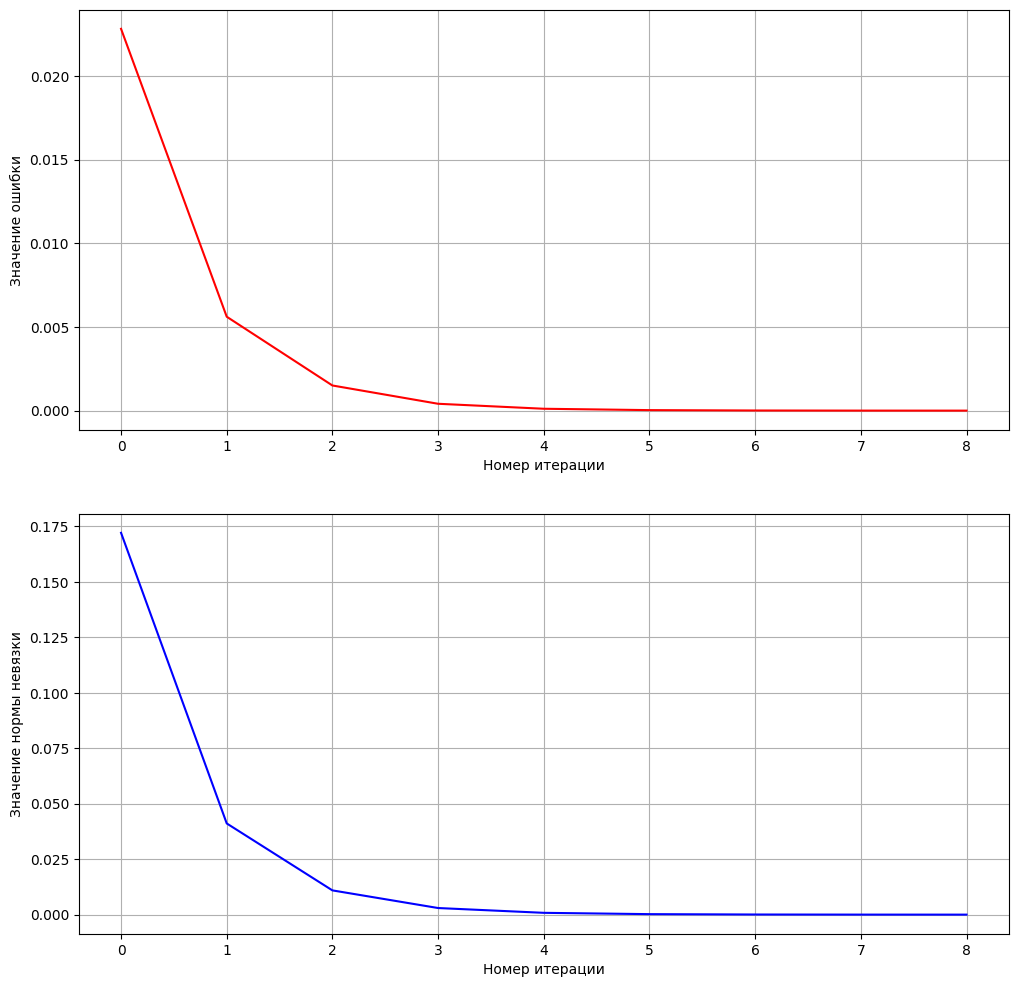

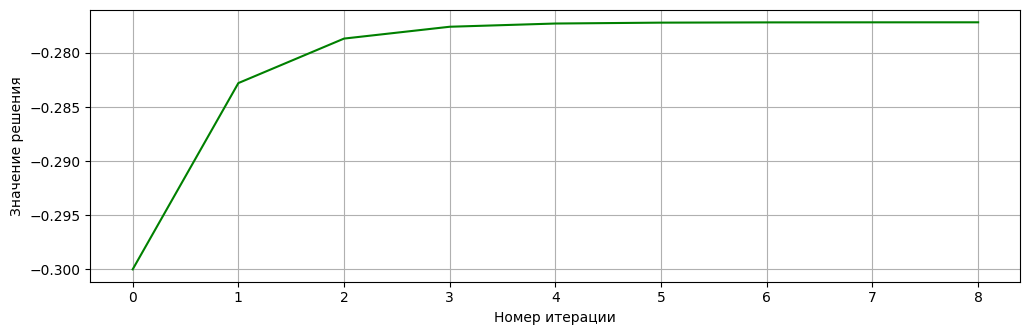

In [44]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(figsize = (12,12))

plt.subplot(2, 1, 1)
plt.plot(error, c = 'red', label = 'Ошибка')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение ошибки')

plt.subplot(2, 1, 2)
plt.plot(ostan, c = 'blue', label = 'Критерий останова')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение нормы невязки')
plt.show()

fig, ax = plt.subplots(figsize = (12,12))
plt.subplot(3, 1, 3)
plt.plot(X, c = 'green')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение решения')
plt.show()

Похожим образом найдём два других корня \
\
Будем искать $x_{2}$, используя $\tau = 0.1$. Покажем, что его можно использовать, рассмотрев $\varphi^{'}$ на отрезке [0.2, 0.5]\
\
$\varphi(x) = x + 0.1(8x^{3} - 4\ln(1 + 3x^2) + 1)$ \
\
В таком случае, $\varphi^{'}(x) = 1 + 2.4x^{2} - \cfrac{12x}{5 + 15x^{2}}$

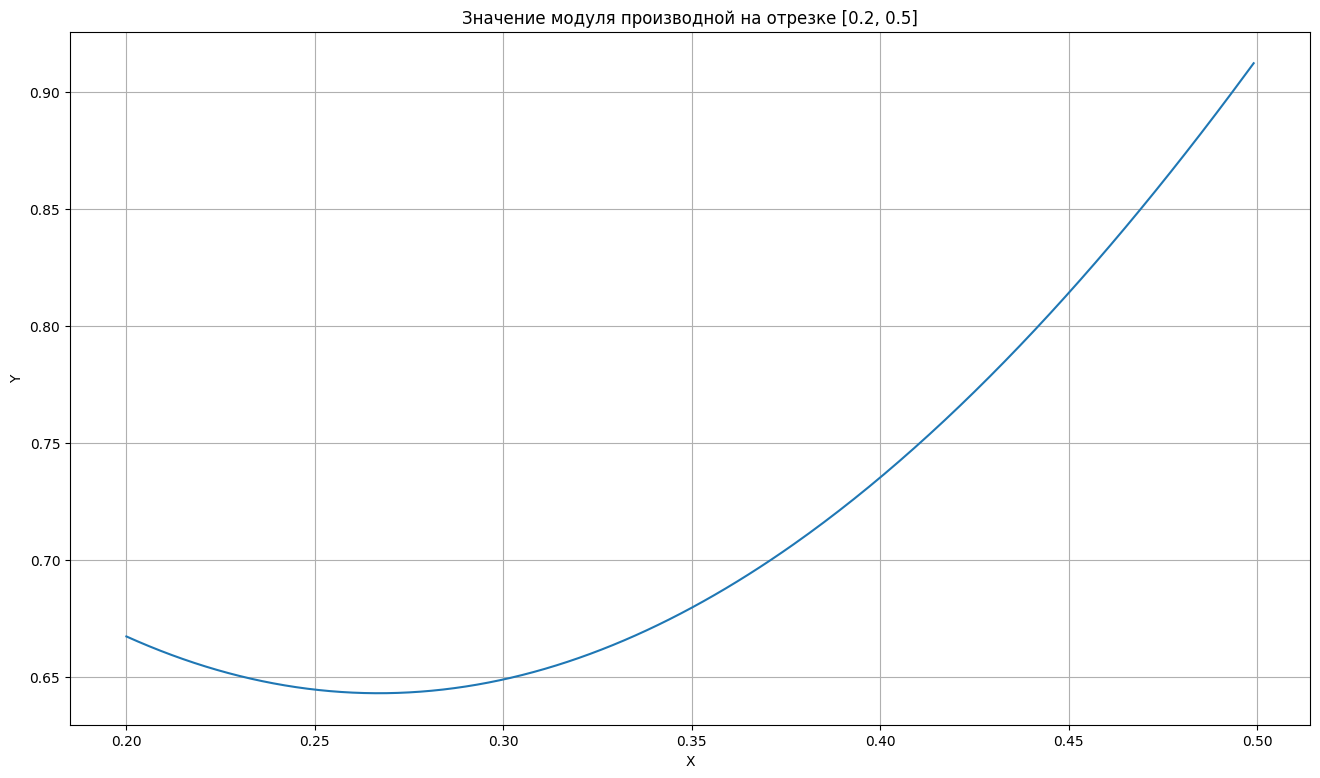

In [45]:
x = np.arange(0.2, 0.5, 0.001)
y = abs(1 + 2.4 * x**2 - 12 * x / (5 + 15 * x**2))
fig, ax = plt.subplots(figsize = (16,9))
plt.plot(x, y)
plt.grid()
plt.title(f'Значение модуля производной на отрезке [0.2, 0.5]')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Как видно из графика, значение модуля производной в некоторой окрестности искомого корня не превышает 0.75. Возьмём его в качестве q \
\
$\varepsilon_{0} = |x_{0} - x^{\star}| \approx 0.01$
\
\
Таким образом $k = \cfrac{\ln(\frac{1}{\varepsilon})}{\ln(\frac{1}{q})} + 1 \approx 24,\, где \,  \varepsilon = \cfrac{10^{-5}}{\varepsilon_{0}}, \, q = 0.75$ \
\
Теперь найдём корень $x_{2}$ итеративно

In [46]:
x = 0.37
k = 0
X = []
X.append(x)
error = [] # Сюда добавляем значение ошибки на каждой итерации
ostan = [] # Сюда добавляем значение критерия останова на каждой итерации
error.append(abs(x - 0.37977137))
ostan.append(abs(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1))
while abs(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1) > 10**(-5):
    k += 1
    x = x + 0.1*(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1)
    X.append(x)
    ostan.append(abs(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1))
    error.append(abs(x - 0.37977137))
print(f'Полученный ответ - {x}, количество итераций - {k}')

Полученный ответ - 0.3797688114313696, количество итераций - 24


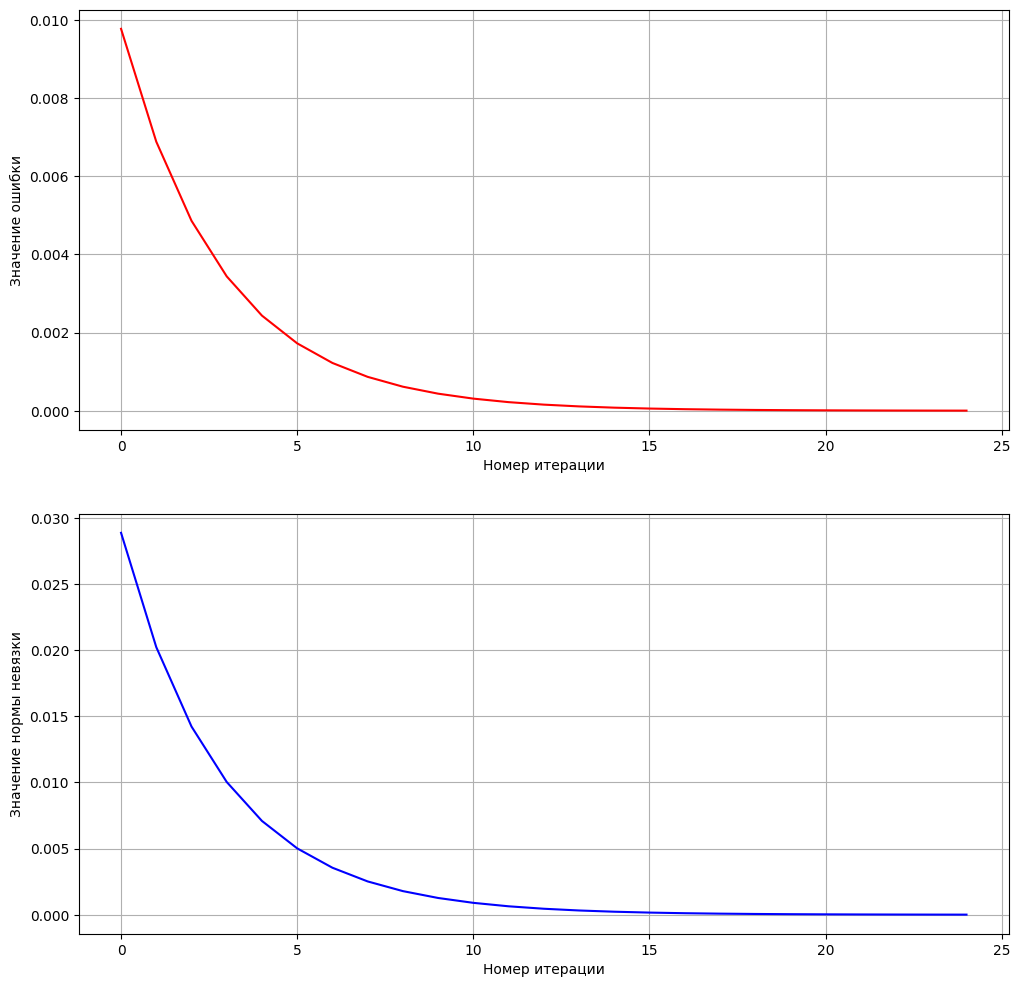

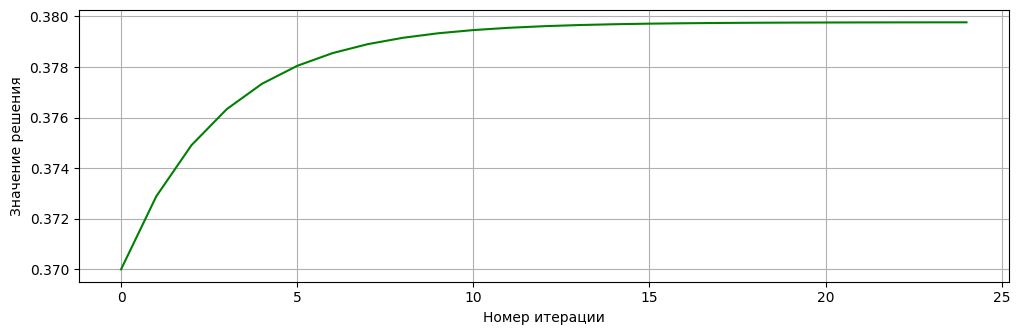

In [47]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(figsize = (12,12))

plt.subplot(2, 1, 1)
plt.plot(error, c = 'red', label = 'Ошибка')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение ошибки')

plt.subplot(2, 1, 2)
plt.plot(ostan, c = 'blue', label = 'Критерий останова')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение нормы невязки')
plt.show()

fig, ax = plt.subplots(figsize = (12,12))
plt.subplot(3, 1, 3)
plt.plot(X, c = 'green')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение решения')
plt.show()


Будем искать $x_{3}$, преобразовав выражение следующим оразом: $x = \sqrt[3]{\cfrac{4\ln(1 + 3x^{2}) - 1}{8}}$ \
\
Получаем, что $\varphi(x) =  \sqrt[3]{\cfrac{4\ln(1 + 3x^{2}) - 1}{8}}, \quad \varphi^{'}(x) = \cfrac{4x}{\sqrt[3]{(4\ln(1 + 3x^{2})-1)^{2}}(1 + 3x^{2})}$ \
\
Построим график $\varphi^{'}(x)$ на отрезке [0.6, 0.8]

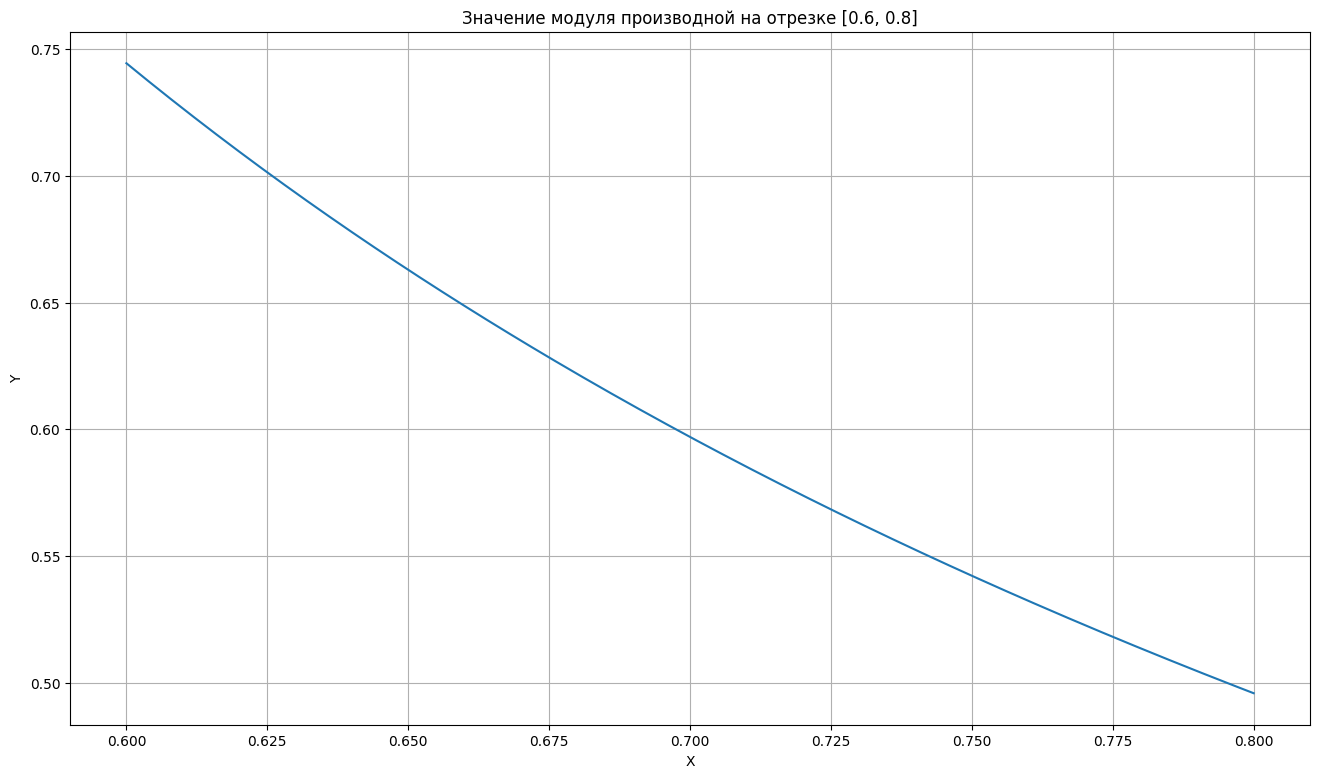

In [48]:
x = np.arange(0.6, 0.8, 0.001)
y = abs(4*x / ((1 + 3*x**2) * (4*np.log(1 + 3*x**2) - 1)**(2/3)))
fig, ax = plt.subplots(figsize = (16,9))
plt.plot(x, y)
plt.grid()
plt.title(f'Значение модуля производной на отрезке [0.6, 0.8]')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Как видно из графика, значение модуля производной в некоторой окрестности искомого корня не превышает 0.65. Возьмём его в качестве q \
\
$\varepsilon_{0} = |x_{0} - x^{\star}| \approx 0.02$
\
Таким образом $k = \cfrac{\ln(\frac{1}{\varepsilon})}{\ln(\frac{1}{q})} + 1 \approx 14,\, где \:  \varepsilon = \cfrac{10^{-5}}{\varepsilon_{0}}, \, q = 0.65$ \
\
Теперь найдём корень $x_{3}$ итеративно

In [49]:
x = 0.65
k = 0
X = []
X.append(x)
error = [] # Сюда добавляем значение ошибки на каждой итерации
ostan = [] # Сюда добавляем значение критерия останова на каждой итерации
error.append(abs(x - 0.67150410))
ostan.append(abs(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1))
while abs(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1) > 10**(-5):
    k += 1
    x = ((4*np.log(1 + 3*x**2) - 1) / 8 )**(1/3)
    X.append(x)
    ostan.append(abs(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1))
    error.append(abs(x - 0.67150410))
print(f'Полученный ответ - {x}, количество итераций - {k}')

Полученный ответ - 0.67150165955921, количество итераций - 20


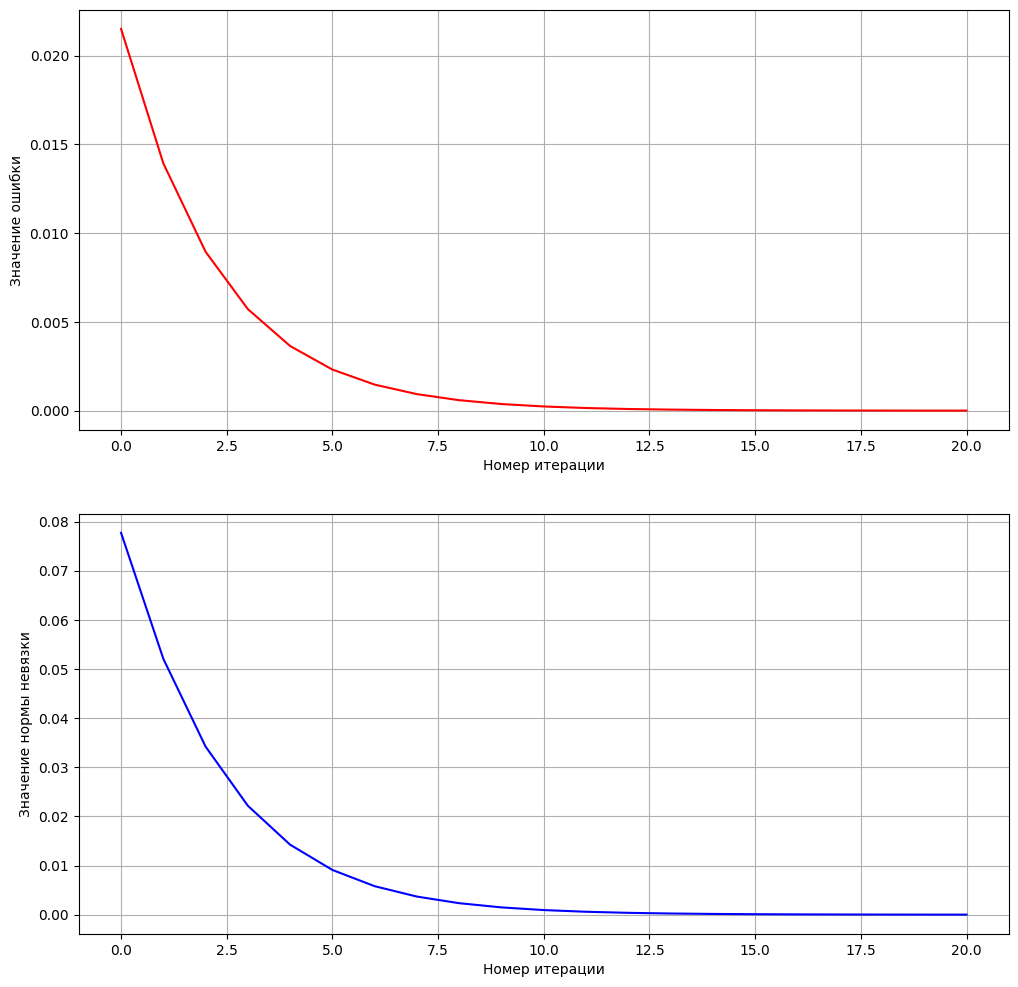

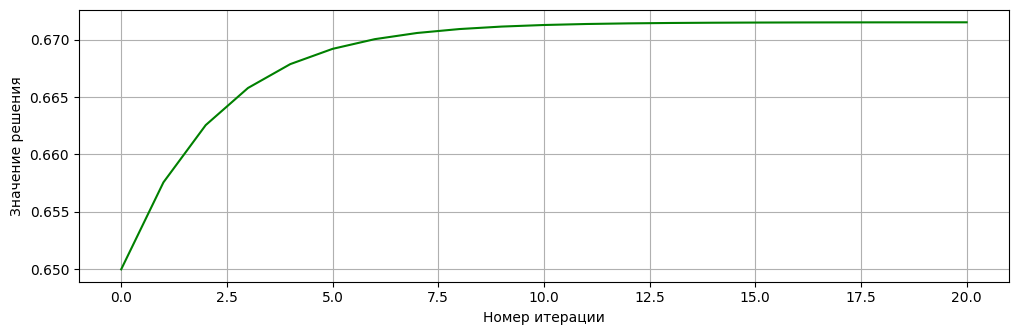

In [50]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(figsize = (12,12))

plt.subplot(2, 1, 1)
plt.plot(error, c = 'red', label = 'Ошибка')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение ошибки')

plt.subplot(2, 1, 2)
plt.plot(ostan, c = 'blue', label = 'Критерий останова')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение нормы невязки')
plt.show()

fig, ax = plt.subplots(figsize = (12,12))
plt.subplot(3, 1, 3)
plt.plot(X, c = 'green')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение решения')
plt.show()

## Метод Ньютона

$f(x) = 8x^3 - 4\ln(1+3x^2) + 1$ \
\
$f^{'}(x) = 24x^{2} - \cfrac{24x}{1 + 3x^{2}}$ \
\
$x_{k+1} = x_{k} - \cfrac{f(x)}{f^{'}(x)}$ \
\
Построим график $f^{'}(x)$

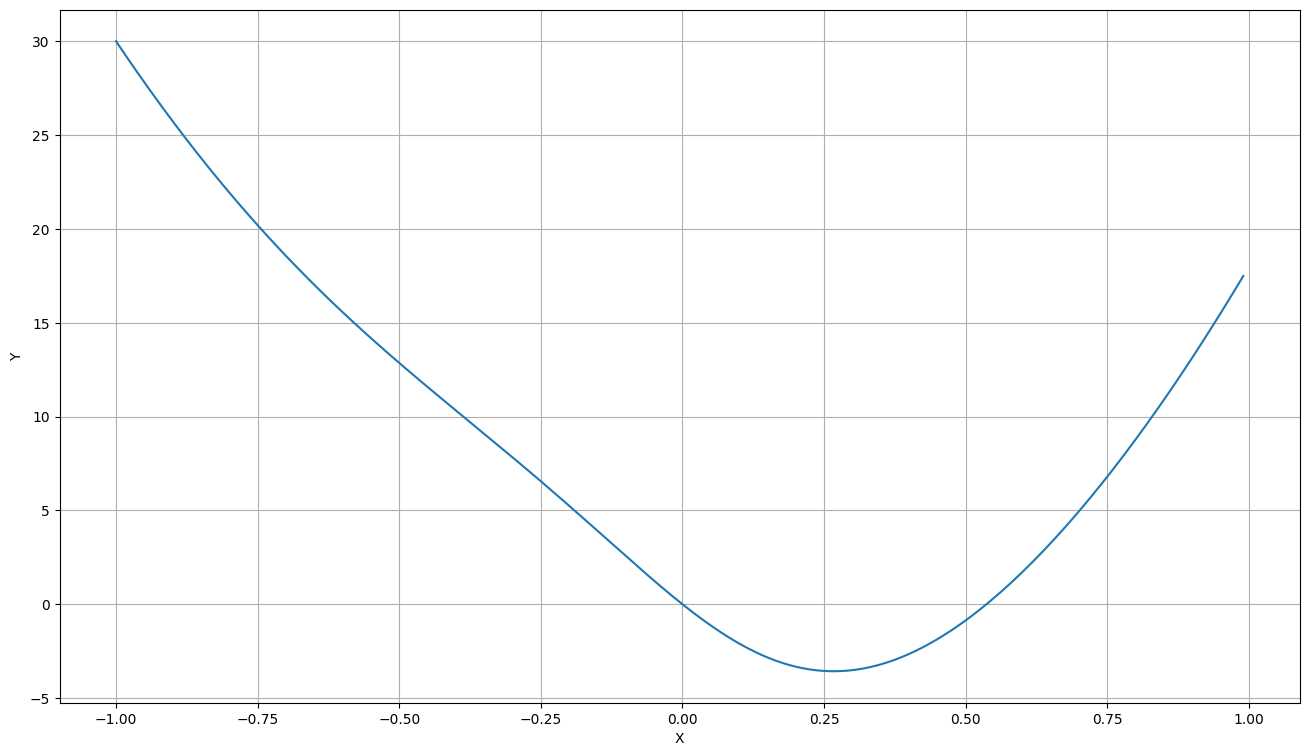

In [51]:
x = np.arange(-1, 1, 0.01)
y = 24*x**2 - (24*x) / (1 + 3*x**2)
fig, ax = plt.subplots(figsize = (16,9))
plt.grid()
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Из графика видно, что производная непрерывна и не обнуляется в окрестностях искомых корней. Следовательно, метод Ньютона применим

In [52]:
x = -0.3
k = 0
X = []
X.append(x)
error = [] # Сюда добавляем значение ошибки на каждой итерации
ostan = [] # Сюда добавляем значение критерия останова на каждой итерации
error.append(abs(x - -0.27717988))
ostan.append(abs(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1))
while abs(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1) > 10**(-5):
    k += 1
    x = x - (8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1) / (24*x**2 - (24*x) / (1 + 3*x**2))
    X.append(x)
    ostan.append(abs(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1))
    error.append(abs(x - -0.27717988))
print(f'Полученный ответ - {x}, количество итераций - {k}')


Полученный ответ - -0.27718112936898265, количество итераций - 2


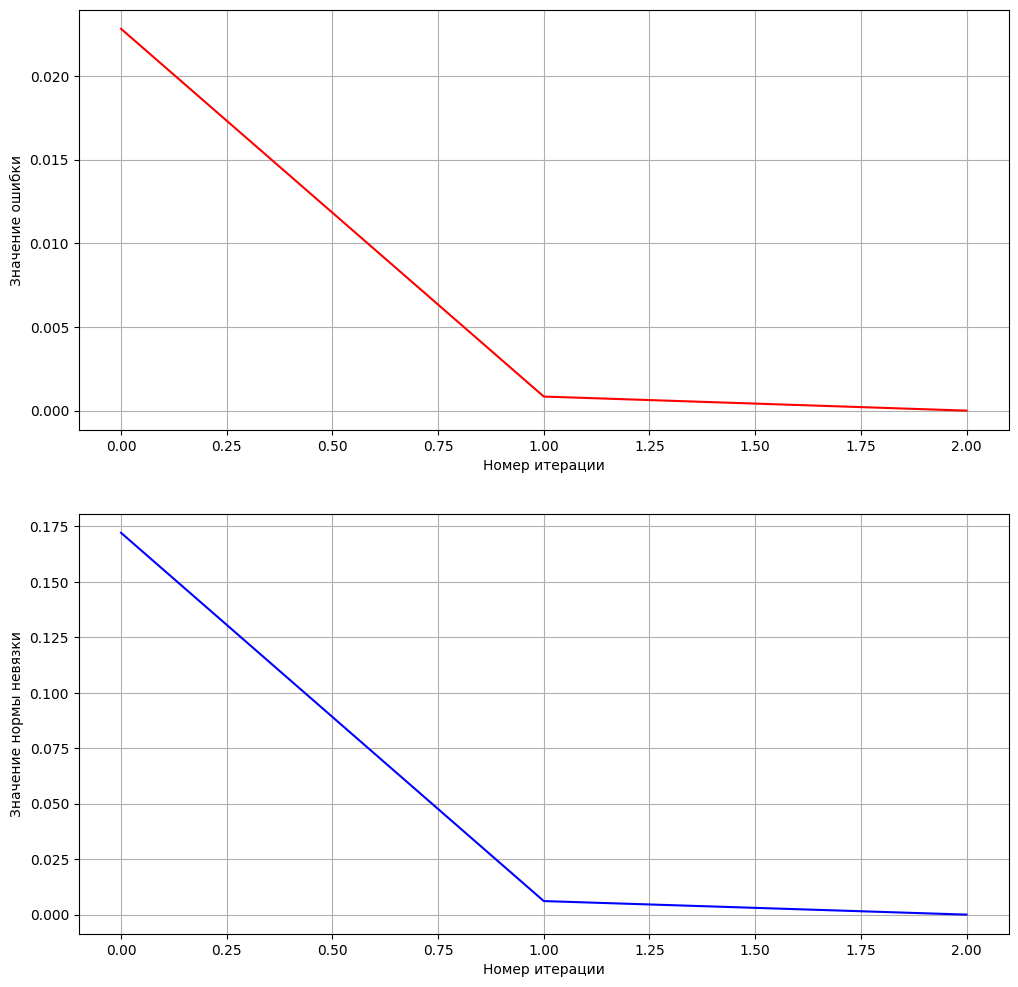

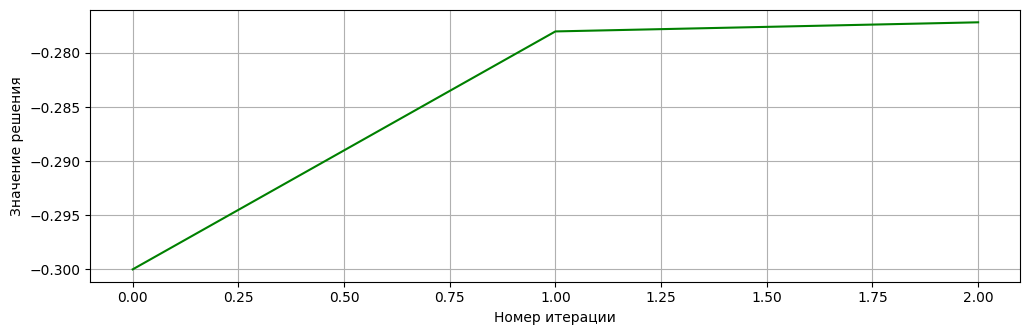

In [53]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(figsize = (12,12))

plt.subplot(2, 1, 1)
plt.plot(error, c = 'red', label = 'Ошибка')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение ошибки')

plt.subplot(2, 1, 2)
plt.plot(ostan, c = 'blue', label = 'Критерий останова')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение нормы невязки')
plt.show()

fig, ax = plt.subplots(figsize = (12,12))
plt.subplot(3, 1, 3)
plt.plot(X, c = 'green')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение решения')
plt.show()

In [54]:
x = 0.37
k = 0
X = []
X.append(x)
error = [] # Сюда добавляем значение ошибки на каждой итерации
ostan = [] # Сюда добавляем значение критерия останова на каждой итерации
error.append(abs(x - 0.37977137))
ostan.append(abs(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1))
while abs(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1) > 10**(-5):
    k += 1
    x = x - (8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1) / (24*x**2 - (24*x) / (1 + 3*x**2))
    X.append(x)
    ostan.append(abs(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1))
    error.append(abs(x - 0.37977137))
print(f'Полученный ответ - {x}, количество итераций - {k}')


Полученный ответ - 0.3797713087754574, количество итераций - 2


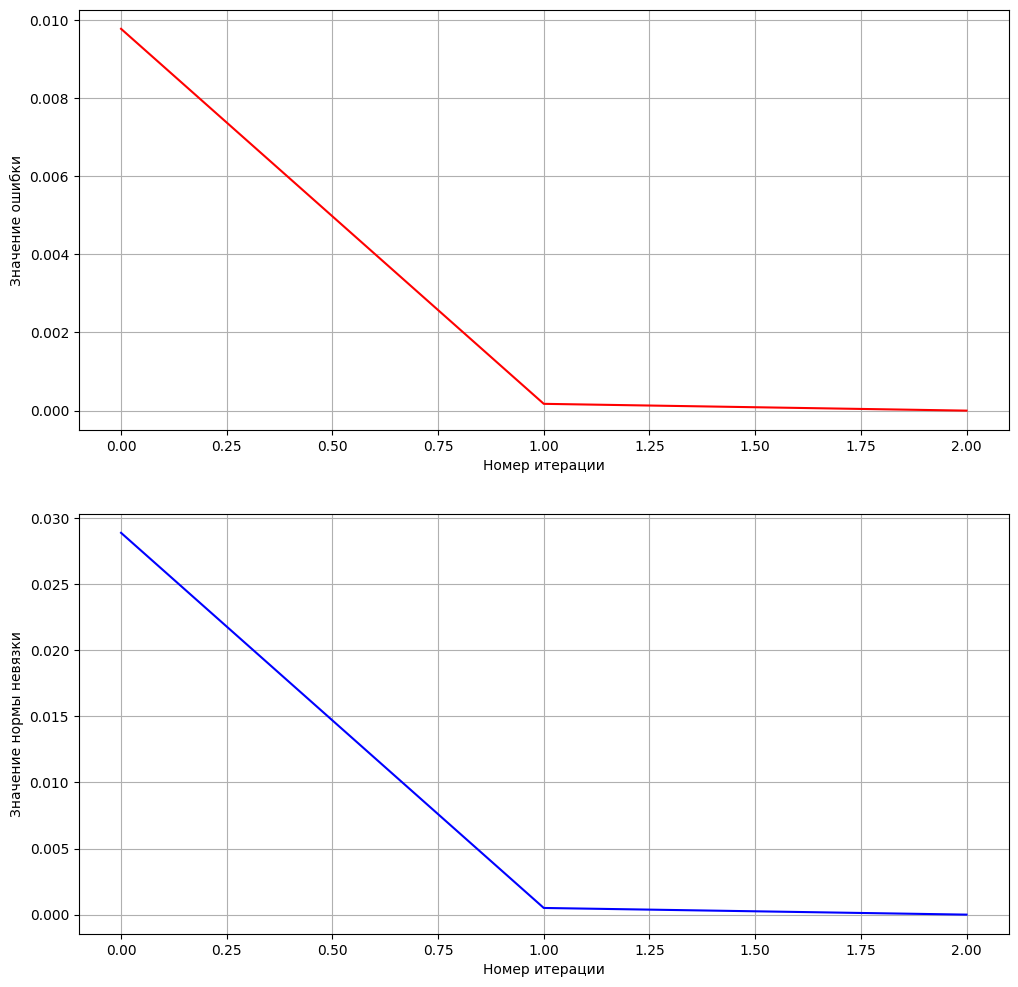

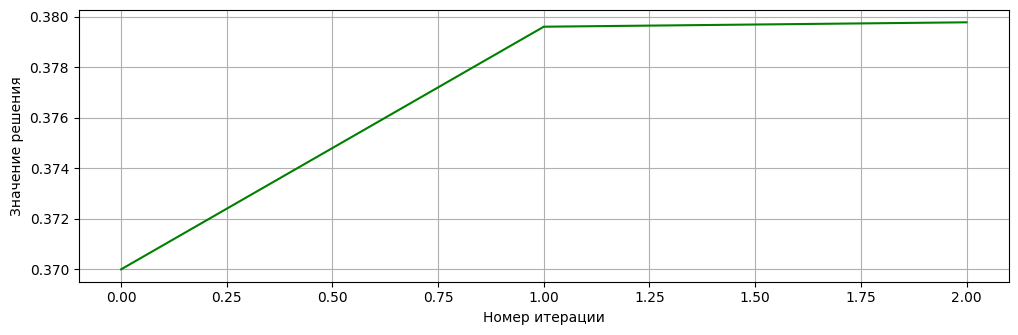

In [55]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(figsize = (12,12))

plt.subplot(2, 1, 1)
plt.plot(error, c = 'red', label = 'Ошибка')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение ошибки')

plt.subplot(2, 1, 2)
plt.plot(ostan, c = 'blue', label = 'Критерий останова')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение нормы невязки')
plt.show()

fig, ax = plt.subplots(figsize = (12,12))
plt.subplot(3, 1, 3)
plt.plot(X, c = 'green')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение решения')
plt.show()

In [56]:
x = 0.6
k = 0
X = []
X.append(x)
error = [] # Сюда добавляем значение ошибки на каждой итерации
ostan = [] # Сюда добавляем значение критерия останова на каждой итерации
error.append(abs(x - 0.67150410))
ostan.append(abs(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1))
while abs(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1) > 10**(-5):
    k += 1
    x = x - (8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1) / (24*x**2 - (24*x) / (1 + 3*x**2))
    X.append(x)
    ostan.append(abs(8 * x**3 - 4 * np.log(1 + 3 * x**2) + 1))
    error.append(abs(x - 0.67150410))
print(f'Полученный ответ - {x}, количество итераций - {k}')


Полученный ответ - 0.6715042418486776, количество итераций - 4


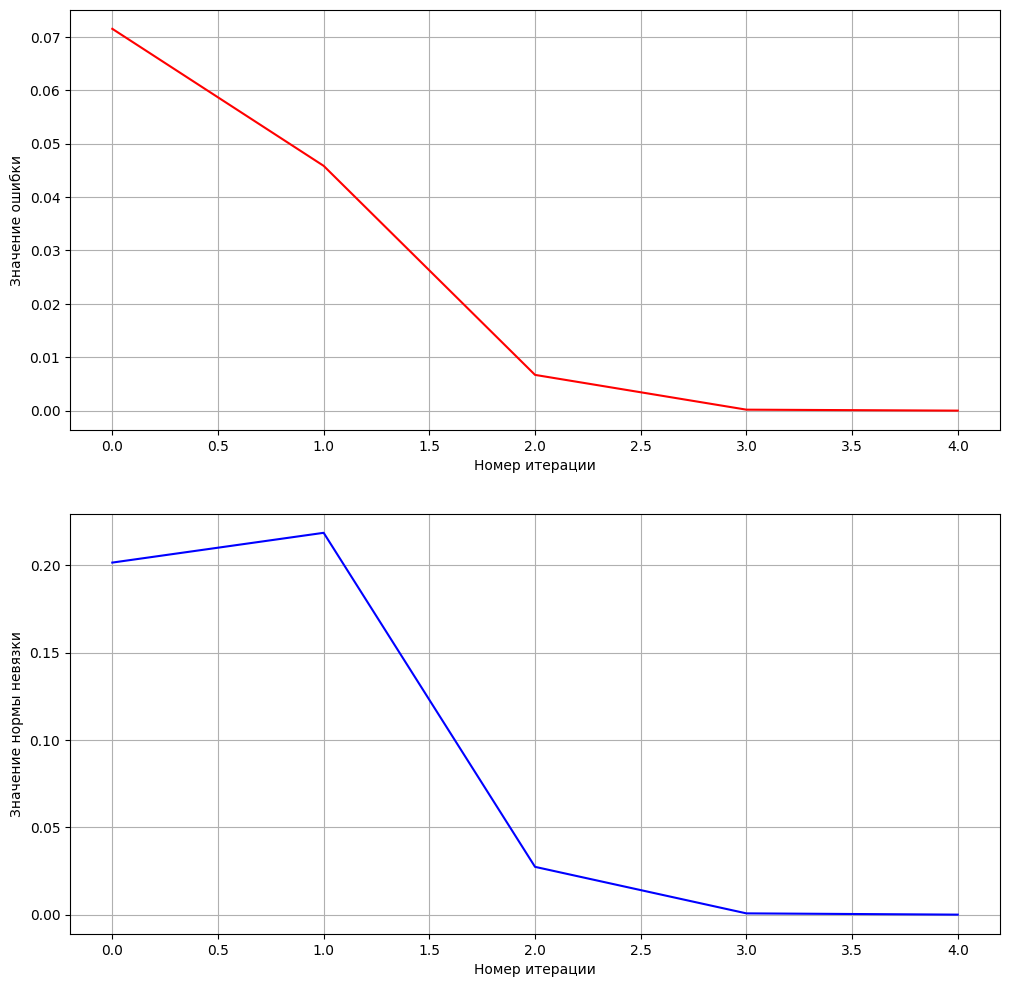

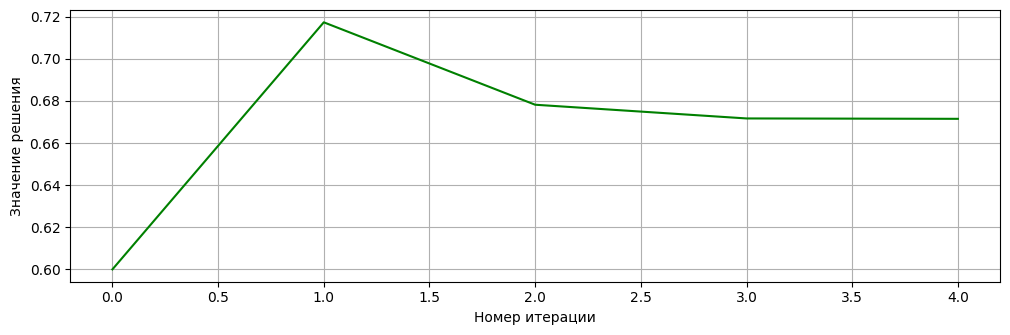

In [57]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(figsize = (12,12))

plt.subplot(2, 1, 1)
plt.plot(error, c = 'red', label = 'Ошибка')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение ошибки')

plt.subplot(2, 1, 2)
plt.plot(ostan, c = 'blue', label = 'Критерий останова')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение нормы невязки')
plt.show()

fig, ax = plt.subplots(figsize = (12,12))
plt.subplot(3, 1, 3)
plt.plot(X, c = 'green')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение решения')
plt.show()

## Итог
Корни, полученные с помощью метода простой итерации: $x_{1} = -0.2771805282533204, \quad x_{2} = 0.3797688114313696, \quad x_{3} = 0.67150165955921$ \
\
Корни, полученные с помощью метода Ньютона: $x_{1} = -0.27718112936898265, \quad x_{2} = 0.3797713087754574, \quad x_{3} = 0.6715042418486776$ \
\
Конечно же, важно заметить, что метод Ньютона позволил находить корни уравнения за гораздо меньшее число итераций в сравнении с методом простой итерации.